In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D #for 3d plotting
import cv2 
pd.set_option("display.max_rows", None)

Exploration phase: working with images

I've created a simple image of 3 big dots in red, green and blue to explore the image. Using the OpenCV library to load and transform the images

In [2]:
image_test = cv2.imread("images/redgreenblue.png")

In [3]:
#OpenCV documentation states that the image is loaded in BGR format, therefore tranforming to RGB
#RGB is what we are used to when seeing images on the computer.

image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

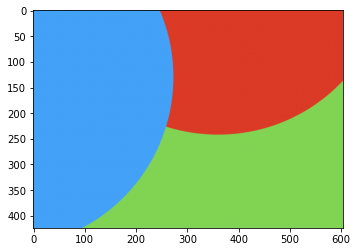

In [4]:
plt.imshow(image_test)

In [5]:
type(image_test)

numpy.ndarray

Images are made out of pixels. The pixels of RGB (Red, Green, Blue). The values range from 0 to 255.

In [6]:
#Expecting 3 unique sets of color values. Looks like the values are slightly differing, probably because I created 
#the image in a presentation tool and took a screenshot of it

#to access: data_type array_name[block_size][row_size][column_size]

print(image_test)

[[[ 68 161 248]
  [ 67 163 248]
  [ 67 162 248]
  ...
  [219  58  38]
  [219  58  38]
  [218  58  37]]

 [[ 67 162 248]
  [ 67 161 248]
  [ 67 162 248]
  ...
  [218  58  39]
  [219  58  38]
  [219  58  38]]

 [[ 67 163 248]
  [ 67 162 247]
  [ 67 163 247]
  ...
  [219  59  38]
  [220  59  38]
  [218  59  37]]

 ...

 [[ 67 162 248]
  [ 67 162 248]
  [ 66 163 247]
  ...
  [129 213  83]
  [129 211  84]
  [129 213  83]]

 [[ 68 161 247]
  [ 67 162 249]
  [ 67 162 248]
  ...
  [129 212  82]
  [129 212  83]
  [130 212  84]]

 [[ 67 162 248]
  [ 67 162 248]
  [ 67 161 248]
  ...
  [129 212  83]
  [129 212  83]
  [129 213  83]]]


In [7]:
len(image_test)

424

In [8]:
#meaning: (block size/number of 2d arrays, rows of 2d arrays, columns of 2d arrays)

image_test.shape

(424, 604, 3)

Let's see how the values look like when plotted in a scatterplot. When plotting the color values in 3d, it's visible that there are 3 colors present in the image.

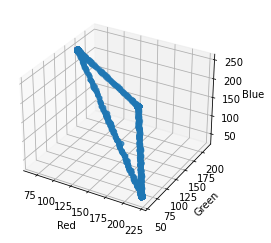

In [9]:
#https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html
#need to flatten because the values are nested, as can be seen in the printed numpy.ndarray

#split the image to get the 3 different values out
red, green, blue = cv2.split(image_test)

#create 3 axes
red = red.flatten()
green = green.flatten()
blue = blue.flatten()

#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red, green, blue)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

Let's have a look at a classic image to check if someone's colorblind

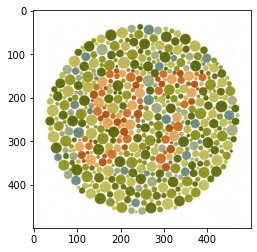

In [10]:
#https://www.colorlitelens.com/ishihara-test

colorblind_image = cv2.imread("images/Ishihara_09.jpg")
colorblind_image = cv2.cvtColor(colorblind_image, cv2.COLOR_BGR2RGB)
plt.imshow(colorblind_image)

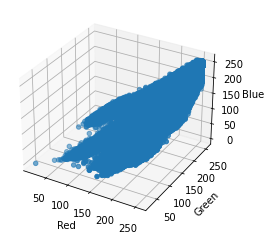

In [11]:
#create 3 axes
r, g, b = cv2.split(colorblind_image)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r, g, b)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [12]:
type(colorblind_image)

numpy.ndarray

In [13]:
#there is a lot of white available around the circle

print(colorblind_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]]


In [14]:
len(colorblind_image)

500

In [15]:
colorblind_image.shape

(500, 500, 3)

Kmeans clustering with OpenCV. Can show the clusters within the image itself

OpenCV doesn't offer the option to check the optimal amount of clusters (?), have to give the amount of clusters beforehand

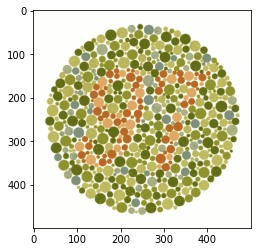

In [16]:
#https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = colorblind_image.reshape((-1,3))

# convert to np.float32
pixels = np.float32(pixels)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 11 #manual check: non colorblind person saw the number clearest with K=11, at K=10 it was more difficult
ret,label,center=cv2.kmeans(pixels,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((colorblind_image.shape))

plt.imshow(res)
plt.show()

Creating dataframe from the numpy.ndarray and change the main colors to detect the number inside the circle

In [17]:
#to see all rows

pd.set_option("display.max_rows", None)

In [18]:
#converting to 2d array to be able to convert it into a dataframe

colorblind_image_df = pd.DataFrame(data=colorblind_image.reshape((-1,3)), columns=["Red", "Green", "Blue"])

In [19]:
colorblind_image_df.head(100)

Red  Green  Blue
0   255    255   255
1   255    255   255
2   255    255   255
3   255    255   255
4   255    255   255
5   255    255   255
6   255    255   255
7   255    255   255
8   255    255   255
9   255    255   255
10  255    255   255
11  255    255   255
12  255    255   255
13  255    255   255
14  255    255   255
15  255    255   255
16  255    255   255
17  255    255   255
18  255    255   255
19  255    255   255
20  255    255   255
21  255    255   255
22  255    255   255
23  255    255   255
24  255    255   255
25  255    255   255
26  255    255   255
27  255    255   255
28  255    255   255
29  255    255   255
30  255    255   255
31  255    255   255
32  255    255   255
33  255    255   255
34  255    255   255
35  255    255   255
36  255    255   255
37  255    255   255
38  255    255   255
39  255    255   255
40  255    255   255
41  255    255   255
42  255    255   255
43  255    255   255
44  255    255   255
45  255    255   255
46  255    255   255
47  255    255   255
48  255    255   255
49  255    255   255
50  255    255   255
51  255    255   255
52  255    255   255
53  255    255   255
54  255    255   255
55  255    255   255
56  255    255   255
57  255    255   255
58  255    255   255
59  255    255   255
60  255    255   255
61  255    255   255
62  255    255   255
63  255    255   255
64  255    255   255
65  255    255   255
66  255    255   255
67  255    255   255
68  255    255   255
69  255    255   255
70  255    255   255
71  255    255   255
72  255    255   255
73  255    255   255
74  255    255   255
75  255    255   255
76  255    255   255
77  255    255   255
78  255    255   255
79  255    255   255
80  255    255   255
81  255    255   255
82  255    255   255
83  255    255   255
84  255    255   255
85  255    255   255
86  255    255   255
87  255    255   255
88  255    255   255
89  255    255   255
90  255    255   255
91  255    255   255
92  255    255   255
93  255    255   255
94  255    255   255
95  255    255   255
96  255    255   255
97  255    255   255
98  255    255   255
99  255    255   255

Checking unique values and deciding how to group them into N amount of unique combinations to change the color groups easier. That way can change the colors to be able to see the number inside the circle

In [20]:
colorblind_image_df.nunique()

Red      207
Green    206
Blue     256
dtype: int64

In [21]:
colorblind_image_df["Red"].value_counts().sort_index()

15         1
41         1
47         1
50         1
53         1
54         2
55         1
56         3
57         5
58         4
59         9
60         9
61         9
62         9
63        15
64        12
65        19
66        24
67        34
68        34
69        62
70        61
71        67
72        70
73        98
74       112
75       134
76       155
77       225
78       246
79       283
80       299
81       303
82       362
83       394
84       481
85       510
86       555
87       608
88       643
89       702
90       754
91       800
92       790
93       883
94       880
95       864
96       925
97       945
98       952
99      1016
100     1049
101     1008
102      933
103      971
104      975
105      926
106      897
107      838
108      879
109      818
110      776
111      756
112      724
113      720
114      666
115      612
116      599
117      537
118      529
119      495
120      445
121      394
122      404
123      337
124      346
125      360

In [22]:
colorblind_image_df["Green"].value_counts().sort_index()

25         1
44         1
51         1
52         2
53         1
55         2
56         3
57         2
58         1
59         4
60         2
61         1
62         8
63        11
64         9
65        14
66        19
67        27
68        22
69        34
70        32
71        42
72        47
73        74
74        70
75        71
76       113
77       130
78       147
79       160
80       169
81       211
82       241
83       248
84       303
85       306
86       309
87       335
88       414
89       418
90       458
91       507
92       513
93       579
94       601
95       563
96       695
97       706
98       728
99       770
100      810
101      884
102      857
103      947
104      967
105     1033
106     1059
107     1021
108     1080
109     1137
110     1174
111     1094
112     1105
113     1228
114     1217
115     1133
116     1040
117     1055
118      996
119      996
120      912
121      898
122      868
123      791
124      791
125      718
126      686

In [23]:
colorblind_image_df["Blue"].value_counts().sort_index()

0        597
1        150
2        205
3        227
4        258
5        257
6        342
7        387
8        466
9        475
10       571
11       620
12       686
13       713
14       726
15       853
16       933
17       955
18      1028
19      1049
20      1084
21      1217
22      1182
23      1163
24      1237
25      1203
26      1235
27      1250
28      1371
29      1252
30      1386
31      1354
32      1374
33      1413
34      1438
35      1481
36      1439
37      1493
38      1487
39      1498
40      1482
41      1425
42      1414
43      1310
44      1309
45      1219
46      1186
47      1144
48      1074
49      1007
50       948
51       882
52       724
53       627
54       638
55       606
56       504
57       470
58       441
59       375
60       308
61       300
62       290
63       267
64       254
65       220
66       209
67       199
68       201
69       217
70       195
71       233
72       240
73       255
74       256
75       291
76       353

Spotting empty values inside the columns, let's have a closer look and see what they are and where they come from

In [24]:
#spotting empty values 

colorblind_image_df.value_counts()

Red  Green  Blue
255  255    255     76947
254  254    254      5027
255  255    253      4815
254  254    252      1575
253  253    253      1435
255  255    251       788
     254    255       740
253  253    251       691
254  255    250       590
252  252    252       449
254  254    255       393
     255    255       348
253  254    249       325
255  255    236       323
            250       316
            227       297
252  252    250       287
255  255    234       279
            232       264
            237       264
            230       255
            225       242
            243       231
            228       219
            239       218
            241       199
            248       192
            223       171
            221       170
            244       167
            220       165
251  251    251       162
255  255    246       159
252  253    248       159
254  255    249       156
255  255    226       154
            224       151
254  255    253      

In [25]:
colorblind_image_df.isna().sum()

Red      0
Green    0
Blue     0
dtype: int64

In [26]:
#double check for 0

colorblind_image_df.Red[colorblind_image_df.Red == 0].count()

0

In [27]:
#check for empty string

colorblind_image_df.Red[colorblind_image_df.Red == ""].count()

/Users/malonkraaijvanger/opt/anaconda3/envs/matrix/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


0

In [28]:
#check for white space

colorblind_image_df.Red[colorblind_image_df.Red == " "].count()

/Users/malonkraaijvanger/opt/anaconda3/envs/matrix/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


0

In [29]:
len(colorblind_image_df["Red"].sort_values(ascending=False))

250000

In [30]:
len(colorblind_image_df)

250000

Creating new dataframe with an extra column RGB, which combines the values of the Red, Green, Blue columns

In [31]:
colorblind_image_df["RGB"] = colorblind_image_df[colorblind_image_df.columns[0:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [32]:
colorblind_image_df.head()

Red  Green  Blue          RGB
0  255    255   255  255,255,255
1  255    255   255  255,255,255
2  255    255   255  255,255,255
3  255    255   255  255,255,255
4  255    255   255  255,255,255

In [33]:
colorblind_image_df["RGB"].value_counts()

255,255,255    76947
254,254,254     5027
255,255,253     4815
254,254,252     1575
253,253,253     1435
255,255,251      788
255,254,255      740
253,253,251      691
254,255,250      590
252,252,252      449
254,254,255      393
254,255,255      348
253,254,249      325
255,255,236      323
255,255,250      316
255,255,227      297
252,252,250      287
255,255,234      279
255,255,232      264
255,255,237      264
255,255,230      255
255,255,225      242
255,255,243      231
255,255,228      219
255,255,239      218
255,255,241      199
255,255,248      192
255,255,223      171
255,255,221      170
255,255,244      167
255,255,220      165
251,251,251      162
252,253,248      159
255,255,246      159
254,255,249      156
255,255,226      154
255,255,224      151
254,253,255      147
254,255,253      147
253,253,255      140
255,255,218      138
251,251,249      134
253,254,248      128
255,255,222      118
255,255,235      118
255,255,217      116
255,255,219      116
255,255,231  

In [34]:
#too many unique combinations and wouldn't be efficient to go through them to create my own clusters.

len(colorblind_image_df["RGB"].value_counts())

47028

For simplicity reasons I'm swapping the RGB values to BRG (Blue, Red, Green) to be able to show that I can see the number inside the circle. Since it's not the main part of the project, this is my last step of this particular process.

In [35]:
#OpenCV opens images in RGB mode by default

RGB_to_BRG = cv2.imread("images/Ishihara_09.jpg")

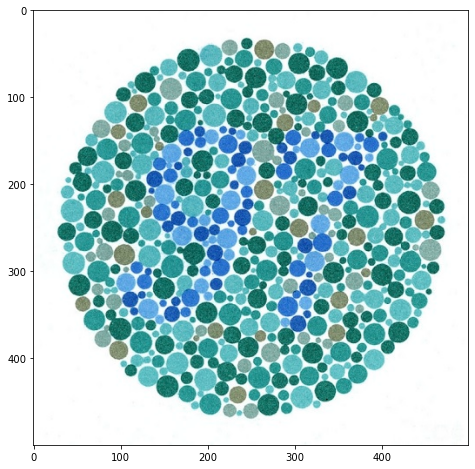

In [36]:
plt.figure(figsize=(8,8))
plt.imshow(RGB_to_BRG)

Number is 97! 